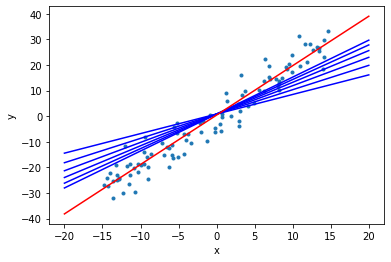

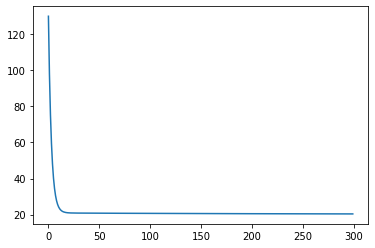

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
np.random.seed(42)

eta = 1.0e-3 # 学習率
nepochs = 300 # エポック数
m = 100 # データ数

x = np.random.rand(m)*30-15
y = 2*x + np.random.randn(m)*5

x = x.astype(np.float32)
y = y.astype(np.float32)

x = torch.from_numpy(x).view(-1, 1)
y = torch.from_numpy(y).view(-1, 1)
w = torch.tensor(1.0, requires_grad=True)
b = torch.tensor(0.0, requires_grad=True)

model = nn.Linear(1, 1)
lossFunc = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=eta)

with torch.no_grad():
    plt.plot([[-20],[20]], [[model(torch.tensor([-20.]))], [model(torch.tensor([20.]))]], "b-")

losses = []
for epoch in range(nepochs):
    p = model(x)
    model.zero_grad()
    loss = lossFunc(p, y)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())
    with torch.no_grad():
        if epoch < 5:
            plt.plot([[-20],[20]], [[model(torch.tensor([-20.]))], [model(torch.tensor([20.]))]], "b-")
        elif epoch == nepochs - 1:
            plt.plot([[-20],[20]], [[model(torch.tensor([-20.]))], [model(torch.tensor([20.]))]], "r-")

plt.scatter(x, y, marker='.')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

plt.plot(losses)
plt.show()